In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
import time

e:\download\python\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 超参数定义(由于我们的隐藏层只有一层，所以可以直接定义为超参数)
# 
batch_size=100
input_feature=100
hidden_feature=1000
output_feature=10
learning_rate=1e-6
epochs=1000

batch_size,表示单词传递给程序用以递给程序用以训练的参数个数，比如我们的训练集有1000个数据。这是如果我们设置batch_size=100，那么程序首先会用数据集中的前100个参数，即第1-100个数据来训练模型。当训练完成后更新权重，再使用第101-200的个数据训练，直至第十次使用完训练集中的1000个数据后停止。

In [6]:
# 参数初始化h=w1x,y=w2h
x=torch.randn(batch_size,input_feature)
y=torch.randn(batch_size,output_feature)
w1=torch.randn(input_feature,hidden_feature)
w2=torch.randn(hidden_feature,output_feature)

Epoch=[]
Loss=[]

  6%|▌         | 56/1000 [00:00<00:15, 62.53it/s]

Epoch:50,loss:97668.21875


 10%|█         | 105/1000 [00:01<00:14, 62.62it/s]

Epoch:100,loss:31485.447265625


 15%|█▌        | 154/1000 [00:02<00:13, 62.61it/s]

Epoch:150,loss:16949.0703125


 21%|██        | 210/1000 [00:03<00:12, 62.59it/s]

Epoch:200,loss:11010.4296875


 26%|██▌       | 259/1000 [00:04<00:11, 62.55it/s]

Epoch:250,loss:7869.7236328125


 31%|███       | 308/1000 [00:04<00:11, 62.47it/s]

Epoch:300,loss:5968.91748046875


 36%|███▌      | 357/1000 [00:05<00:10, 62.49it/s]

Epoch:350,loss:4719.10791015625


 41%|████      | 406/1000 [00:06<00:09, 62.79it/s]

Epoch:400,loss:3849.043212890625


 46%|████▌     | 455/1000 [00:07<00:08, 62.58it/s]

Epoch:450,loss:3216.99365234375


 51%|█████     | 511/1000 [00:08<00:07, 62.61it/s]

Epoch:500,loss:2742.07080078125


 56%|█████▌    | 560/1000 [00:08<00:07, 62.68it/s]

Epoch:550,loss:2375.162353515625


 61%|██████    | 609/1000 [00:09<00:06, 62.71it/s]

Epoch:600,loss:2084.982666015625


 66%|██████▌   | 658/1000 [00:10<00:05, 62.50it/s]

Epoch:650,loss:1850.791015625


 71%|███████   | 707/1000 [00:11<00:04, 62.49it/s]

Epoch:700,loss:1658.484130859375


 76%|███████▌  | 756/1000 [00:12<00:03, 62.52it/s]

Epoch:750,loss:1498.138916015625


 80%|████████  | 805/1000 [00:12<00:03, 62.70it/s]

Epoch:800,loss:1362.693115234375


 86%|████████▌ | 861/1000 [00:13<00:02, 62.74it/s]

Epoch:850,loss:1246.9393310546875


 91%|█████████ | 910/1000 [00:14<00:01, 62.74it/s]

Epoch:900,loss:1147.0006103515625


 96%|█████████▌| 959/1000 [00:15<00:00, 62.73it/s]

Epoch:950,loss:1059.9541015625


100%|██████████| 1000/1000 [00:15<00:00, 62.63it/s]

Epoch:1000,loss:983.505126953125


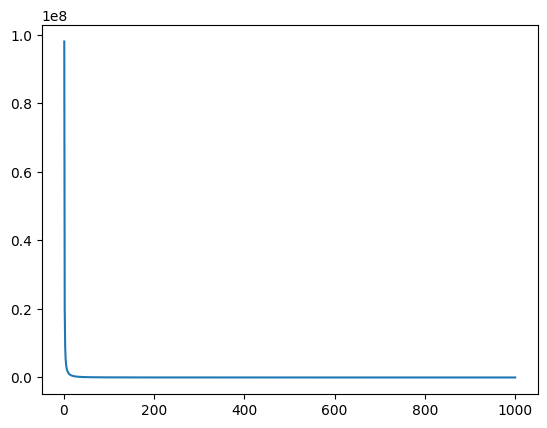

In [7]:
# 迭代训练
for epoch in tqdm(range(1,epochs+1)):
    # 前向传播
    h=x.mm(w1)  # (bs,hf)
    y_pred=h.mm(w2) # (bs,of)
    loss=(y_pred-y).pow(2).sum()
    Epoch.append(epoch)
    Loss.append(loss)
    if epoch%50==0:
        print("Epoch:{},loss:{}".format(epoch,loss))
    # 后向传播
    grad_y_pred=2*(y_pred-y)    # (bs,of)
    grad_w2=grad_y_pred.t().mm(h)   # (of,hf)
    grad_h=grad_y_pred.mm(w2.t())  # (bs,of)
    grad_w1=grad_h.t().mm(x)    # (hf,if)
    # 参数微调
    w1-=learning_rate*grad_w1.t()
    w2-=learning_rate*grad_w2.t()
    time.sleep(0.01)
    
Epoch=np.array(Epoch)
Loss=np.array(Loss)
plt.plot(Epoch,Loss)
plt.show()
